<a href="https://colab.research.google.com/github/Tenientez/Laboratorio-IA/blob/main/P1_YOLOv11_entrenamiento_y_prediccion_plantas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Dataset descargado de:



# https://www.kaggle.com/datasets/ravirajsinh45/crop-and-weed-detection-data-with-bounding-boxes




# Subir Carpetas

Subir carpeta en ZIP

In [19]:
from google.colab import files
uploaded = files.upload()

Saving LAB_IA.zip to LAB_IA.zip


Descomprimir

In [20]:
!unzip LAB_IA.zip -d /content/LAB_IA/

Se truncaron las últimas líneas 5000 del resultado de transmisión.
  inflating: /content/LAB_IA/LAB_IA/P1/agri_data/agri_data/train/images/agri_0_4651.jpeg  
  inflating: /content/LAB_IA/LAB_IA/P1/agri_data/agri_data/train/images/agri_0_4659.jpeg  
  inflating: /content/LAB_IA/LAB_IA/P1/agri_data/agri_data/train/images/agri_0_4665.jpeg  
  inflating: /content/LAB_IA/LAB_IA/P1/agri_data/agri_data/train/images/agri_0_4670.jpeg  
  inflating: /content/LAB_IA/LAB_IA/P1/agri_data/agri_data/train/images/agri_0_4675.jpeg  
  inflating: /content/LAB_IA/LAB_IA/P1/agri_data/agri_data/train/images/agri_0_4684.jpeg  
  inflating: /content/LAB_IA/LAB_IA/P1/agri_data/agri_data/train/images/agri_0_4685.jpeg  
  inflating: /content/LAB_IA/LAB_IA/P1/agri_data/agri_data/train/images/agri_0_4687.jpeg  
  inflating: /content/LAB_IA/LAB_IA/P1/agri_data/agri_data/train/images/agri_0_4690.jpeg  
  inflating: /content/LAB_IA/LAB_IA/P1/agri_data/agri_data/train/images/agri_0_4702.jpeg  
  inflating: /content/L

# Instalar YOLO

In [2]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.183 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 39.0/112.6 GB disk)


In [3]:
import os
import random
import pandas as pd
from PIL import Image
import cv2
# Install ultralytics
%pip install ultralytics
# Import ultralytics
from ultralytics import YOLO
from IPython.display import Video
import numpy as np
import matplotlib.pyplot as plt
#%pip install seaborn
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')

In [4]:
sns.set(rc={'axes.facecolor': '#eae8fa'}, style='darkgrid')

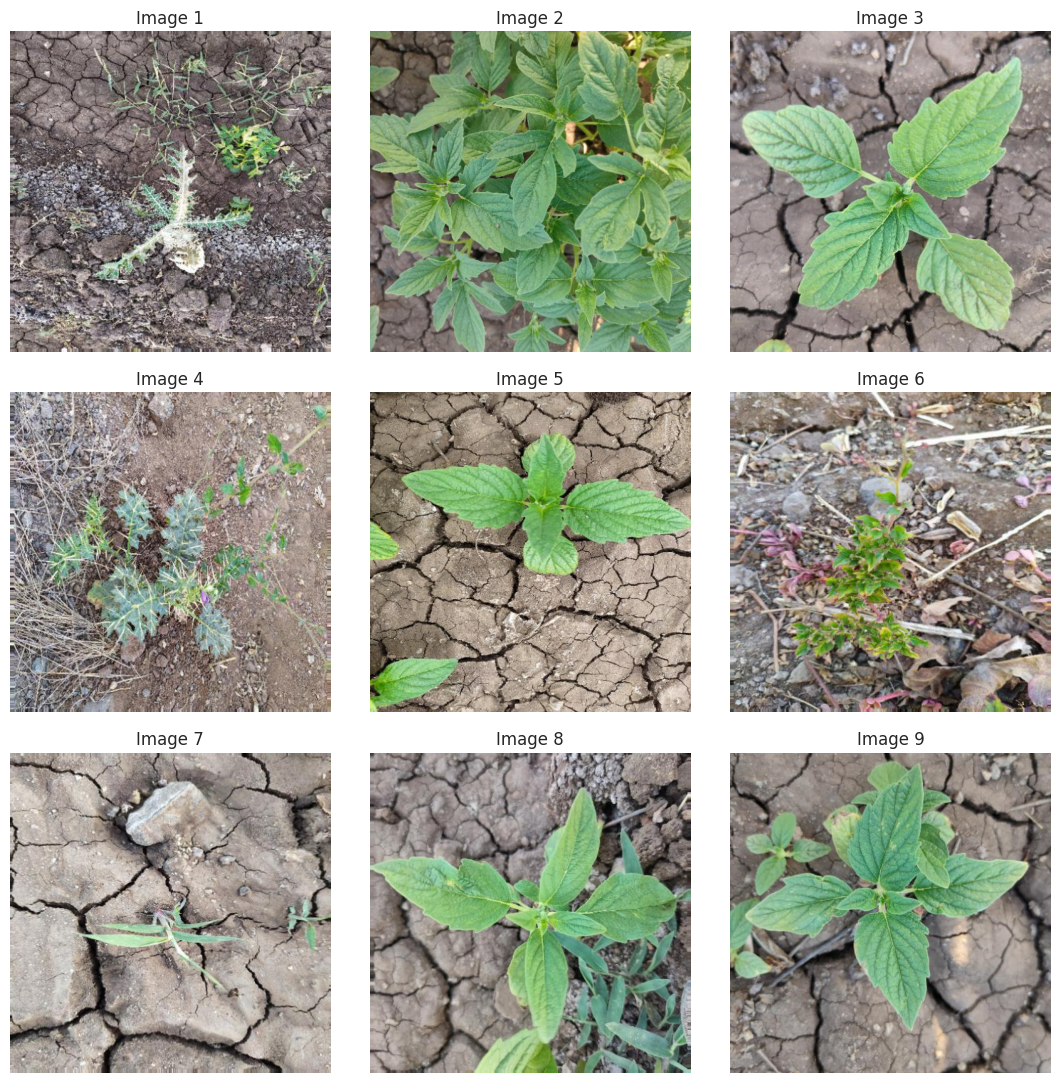

In [21]:
Image_dir = '/content/LAB_IA/LAB_IA/P1/agri_data/agri_data/train/images'
#Image_dir = '/Users/alfonsoortizavila/LabIA/agri_data/train/images'
#Image_dir = '/kaggle/input/cardetection/car/train/images'

num_samples = 9
image_files = os.listdir(Image_dir)

# Randomly select num_samples images
rand_images = random.sample(image_files, num_samples)

fig, axes = plt.subplots(3, 3, figsize=(11, 11))

for i in range(num_samples):
    image = rand_images[i]
    ax = axes[i // 3, i % 3]
    ax.imshow(plt.imread(os.path.join(Image_dir, image)))
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [29]:
# Use a pretrained YOLOv8n model
model = YOLO("yolov8n.pt")



image 1/1 /content/LAB_IA/LAB_IA/P1/agri_data/agri_data/train/images/agri_0_2997.jpeg: 640x640 1 potted plant, 9.2ms
Speed: 3.2ms preprocess, 9.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


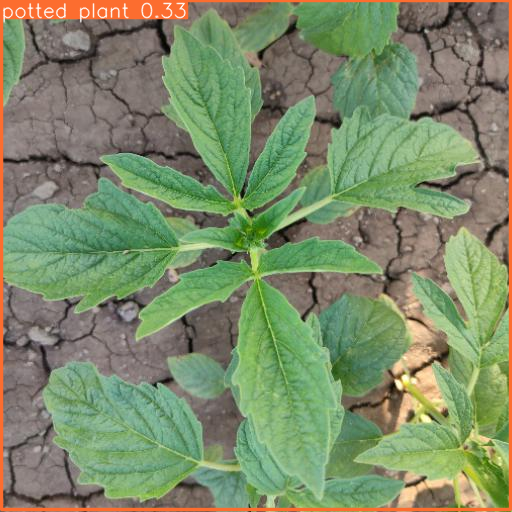

In [30]:
# Use a pretrained YOLOv8n model
model = YOLO("yolov8n.pt")
#model = Final_model
# Use the model to detect object
image = "/content/LAB_IA/LAB_IA/P1/agri_data/agri_data/train/images/agri_0_2997.jpeg"
#image = "/Users/alfonsoortizavila/LabIA/agri_data/train/images/agri_0_2997.jpeg"
result_predict = model.predict(source = image, imgsz=(640))

# show results
plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))


image 1/1 /content/LAB_IA/LAB_IA/P1/agri_data/agri_data/train/images/agri_0_2997.jpeg: 640x640 (no detections), 8.2ms
Speed: 2.2ms preprocess, 8.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


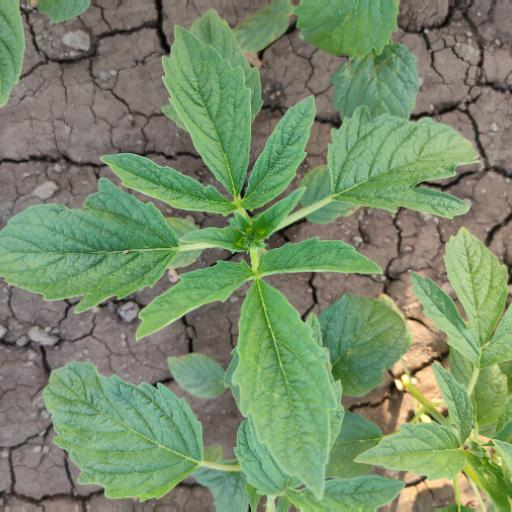

In [31]:

# Use a pretrained YOLOv8n model
#model = YOLO("yolov8n.pt")
#model = Result_Final_model
#model = YOLO("/Users/alfonsoortizavila/LabIA/runs/detect/train13422/weights/best.pt")
model = YOLO("/content/LAB_IA/LAB_IA/P0/runs/detect/train2/weights/best.pt")

# Use the model to detect object
#image = "/Users/alfonsoortizavila/LabIA/agri_data/train/images/agri_0_2997.jpeg"
image = "/content/LAB_IA/LAB_IA/P1/agri_data/agri_data/train/images/agri_0_2997.jpeg"
result_predict = model.predict(source = image, imgsz=(640))

# show results
plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

In [25]:
# Build from YAML and transfer weights
Final_model = YOLO('yolov8n.pt')


In [32]:
# Training The Final Model
Result_Final_model = Final_model.train(data="/content/LAB_IA/LAB_IA/P1/agri_data/agri_data/data.yaml",epochs = 5, batch = 128, optimizer = 'auto')

Ultralytics 8.3.183 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=128, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/LAB_IA/LAB_IA/P1/agri_data/agri_data/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=5, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train9, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots

train: Scanning /content/LAB_IA/LAB_IA/P1/agri_data/agri_data/train/labels.cache... 1201 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1201/1201 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 431.0±75.6 MB/s, size: 56.7 KB)


val: Scanning /content/LAB_IA/LAB_IA/P1/agri_data/agri_data/valid/labels.cache... 99 images, 0 backgrounds, 0 corrupt: 100%|██████████| 99/99 [00:00<?, ?it/s]


Plotting labels to runs/detect/train9/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.001), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train9
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      14.6G       1.36      2.914      1.677        181        640: 100%|██████████| 10/10 [00:30<00:00,  3.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.58s/it]

                   all         99        183     0.0052      0.767      0.248      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      14.3G      1.272      2.176      1.592        172        640: 100%|██████████| 10/10 [00:15<00:00,  1.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.26s/it]

                   all         99        183     0.0052      0.808      0.358      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      14.3G      1.242      1.806      1.546        424        640:  50%|█████     | 5/10 [00:08<00:09,  1.97s/it]

WARNING ⚠️ CUDA OutOfMemoryError in TaskAlignedAssigner, using CPU


        3/5      14.3G      1.229      1.741      1.524        167        640: 100%|██████████| 10/10 [00:18<00:00,  1.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.54s/it]

                   all         99        183      0.894      0.165      0.457       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      14.4G      1.188      1.576      1.492        134        640: 100%|██████████| 10/10 [00:14<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.43s/it]

                   all         99        183      0.916      0.494      0.623      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      14.3G      1.137      1.486      1.458        178        640: 100%|██████████| 10/10 [00:15<00:00,  1.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.67s/it]

                   all         99        183      0.911      0.555      0.687      0.418



5 epochs completed in 0.031 hours.
Optimizer stripped from runs/detect/train9/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train9/weights/best.pt, 6.2MB

Validating runs/detect/train9/weights/best.pt...
Ultralytics 8.3.183 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.10s/it]


                   all         99        183      0.911      0.555      0.687      0.418
                  crop         52        115          1      0.449      0.635      0.419
                  weed         47         68      0.823      0.662      0.738      0.416
Speed: 0.2ms preprocess, 2.5ms inference, 0.0ms loss, 4.6ms postprocess per image
Results saved to runs/detect/train9


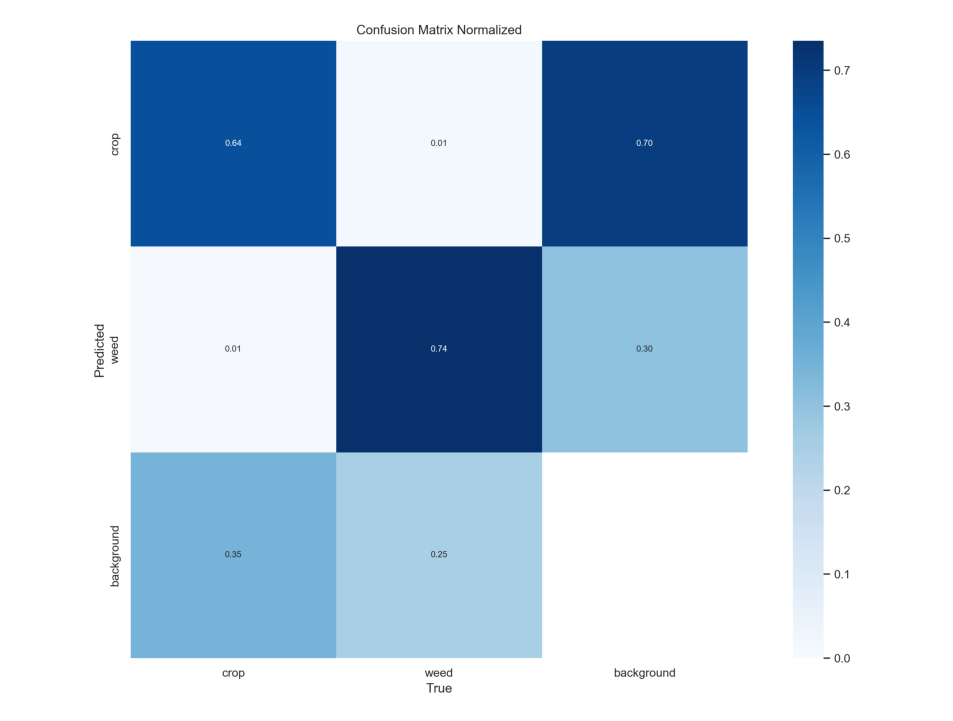

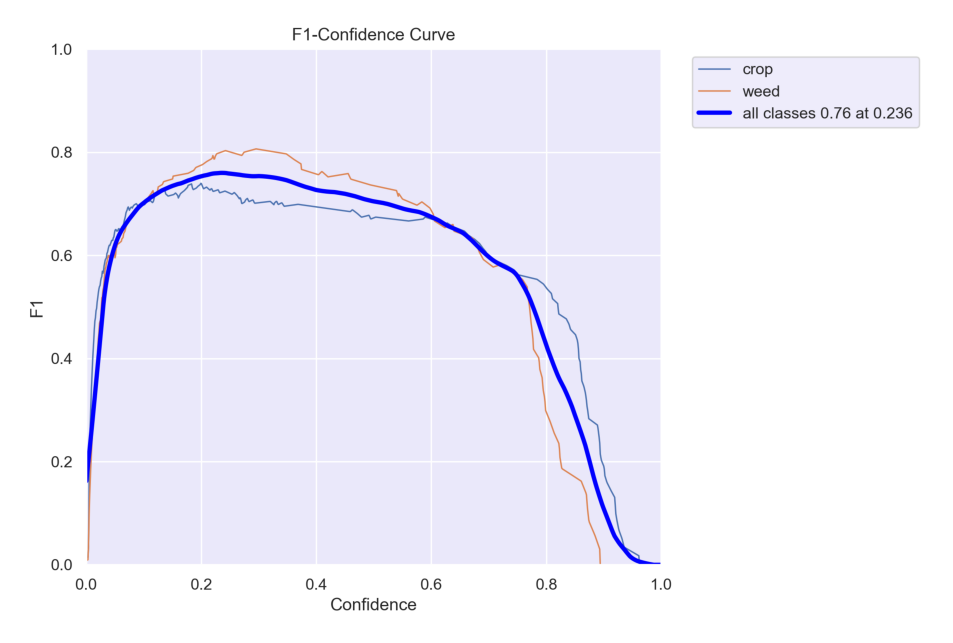

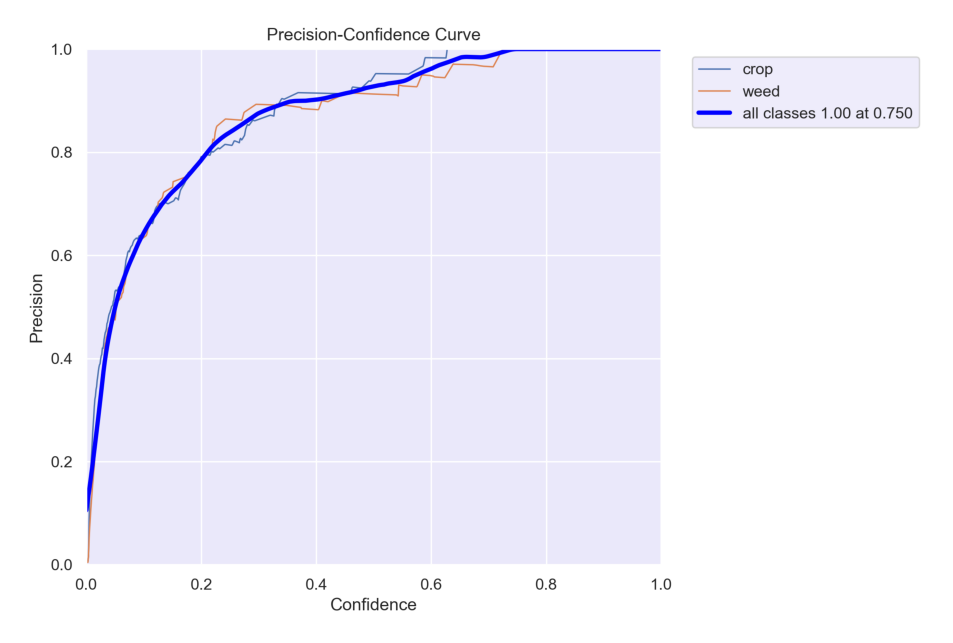

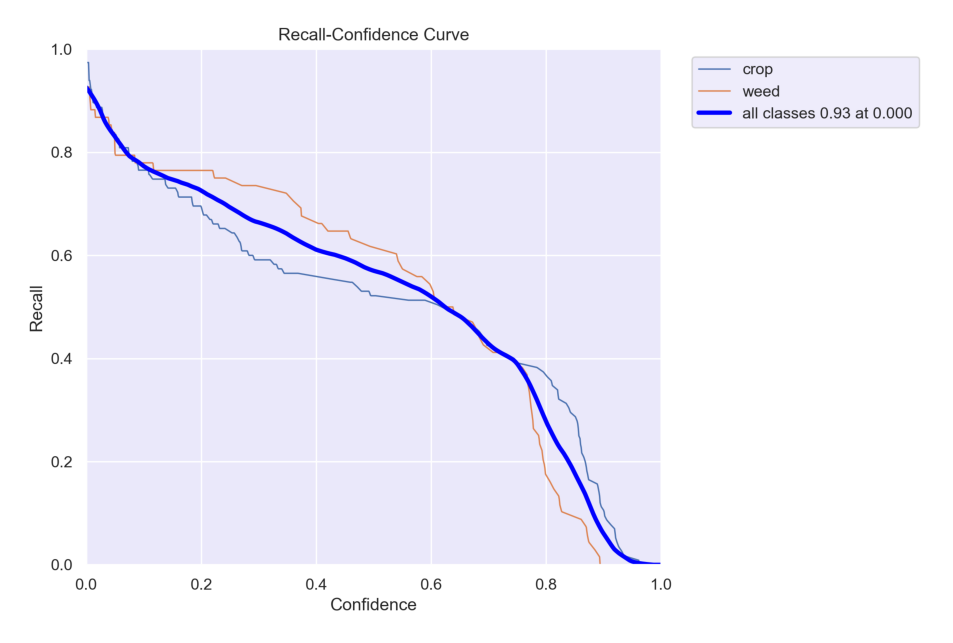

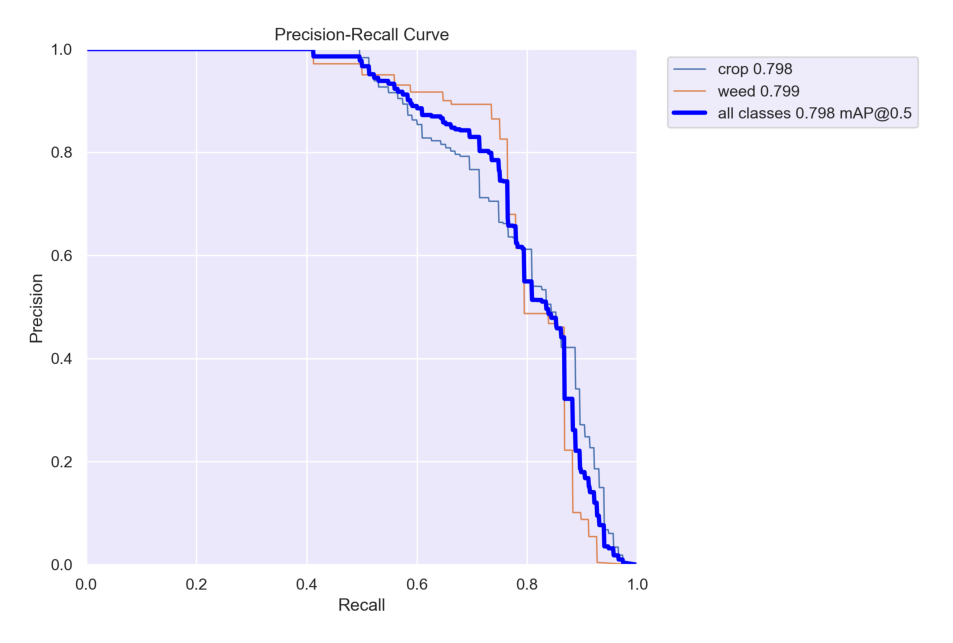

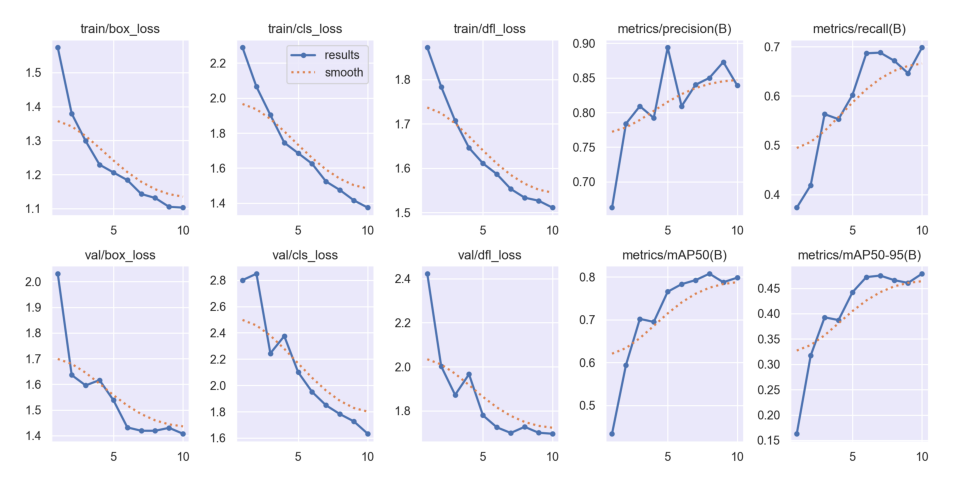

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

def display_images(post_training_files_path, image_files):

    for image_file in image_files:
        image_path = os.path.join(post_training_files_path, image_file)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.figure(figsize=(10, 10), dpi=120)
        plt.imshow(img)
        plt.axis('off')
        plt.show()

# List of image files to display
image_files = [
    'confusion_matrix_normalized.png',
    'F1_curve.png',
    'P_curve.png',
    'R_curve.png',
    'PR_curve.png',
    'results.png'
]

# Path to the directory containing the images
post_training_files_path = '/Users/alfonsoortizavila/LabIA/runs/detect/train13422'

# Display the images
display_images(post_training_files_path, image_files)

In [ ]:


# Loading the best performing model
Valid_model = YOLO('/Users/alfonsoortizavila/LabIA/runs/detect/train8/weights/best.pt')

# Evaluating the model on the validset
metrics = Valid_model.val(split = 'val')

# final results
print("precision(B): ", metrics.results_dict["metrics/precision(B)"])
print("metrics/recall(B): ", metrics.results_dict["metrics/recall(B)"])
print("metrics/mAP50(B): ", metrics.results_dict["metrics/mAP50(B)"])
print("metrics/mAP50-95(B): ", metrics.results_dict["metrics/mAP50-95(B)"])

Ultralytics 8.3.76 🚀 Python-3.10.16 torch-2.2.2 CPU (Intel Core(TM) i9-9980HK 2.40GHz)
Model summary (fused): 72 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /Users/alfonsoortizavila/LabIA/SelfDrivingCar/valid/labels.cache... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [01:02<00:00,  1.22s/it]


                   all        801        944      0.671      0.714      0.726      0.613
           Green Light         87        122      0.585       0.59       0.59      0.329
             Red Light         74        108      0.592      0.694      0.597      0.326
       Speed Limit 100         52         52      0.838      0.595      0.802      0.678
       Speed Limit 110         17         17       0.64      0.647      0.621      0.564
       Speed Limit 120         60         60      0.829      0.733      0.847      0.762
        Speed Limit 20         56         56      0.617      0.929      0.927      0.789
        Speed Limit 30         71         74      0.406      0.838      0.561      0.507
        Speed Limit 40         53         55      0.571      0.873      0.899      0.774
        Speed Limit 50         68         71       0.59      0.547      0.627       0.57
        Speed Limit 60         76         76      0.775      0.635      0.756      0.673
        Speed Limit 7

In [ ]:
# Export the model
Valid_model.export(format='onnx')

In [ ]:
Final_model

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_s